In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [7]:
home=pd.read_csv("../input/homecsv/home.csv")

In [8]:
home

,area,bedrooms,price
0,1056.0,2,39.07
1,2600.0,4,120.00
2,1440.0,3,62.00
3,1521.0,3,75.00
4,1200.0,2,51.00
5,1170.0,2,38.00
6,2732.0,4,165.00
7,3300.0,4,155.00
8,1310.0,3,50.00
9,3700.0,5,167.00


In [9]:
home.sample(2)

,area,bedrooms,price
5,1170.0,2,38.0
6,2732.0,4,165.0


In [10]:
home=home.dropna() #dropping null rows

In [11]:
home

,area,bedrooms,price
0,1056.0,2,39.07
1,2600.0,4,120.00
2,1440.0,3,62.00
3,1521.0,3,75.00
4,1200.0,2,51.00
5,1170.0,2,38.00
6,2732.0,4,165.00
7,3300.0,4,155.00
8,1310.0,3,50.00
9,3700.0,5,167.00


In [12]:
home.dtypes

area        float64
bedrooms      int64
price       float64
dtype: object

In [13]:
home["area"]=home["area"].astype(int)
home["price"]=home["price"].astype(int)

/tmp/ipykernel_32/1189606600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home["area"]=home["area"].astype(int)
/tmp/ipykernel_32/1189606600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home["price"]=home["price"].astype(int)


In [14]:
home.dtypes

area        int64
bedrooms    int64
price       int64
dtype: object

In [15]:
from sklearn import preprocessing

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

In [17]:
    scaled_home=sx.fit_transform(home)

In [18]:
scaled_home

array([[0.        , 0.        , 0.00775194],
       [0.58396369, 0.66666667, 0.63565891],
       [0.14523449, 0.33333333, 0.18604651],
       [0.17586989, 0.33333333, 0.28682171],
       [0.05446293, 0.        , 0.10077519],
       [0.04311649, 0.        , 0.        ],
       [0.63388805, 0.66666667, 0.98449612],
       [0.84871407, 0.66666667, 0.90697674],
       [0.09606657, 0.33333333, 0.09302326],
       [1.        , 1.        , 1.        ]])

In [19]:
scaled_X=sx.fit_transform(home.drop("price",axis=1))

In [20]:
scaled_X
n=scaled_X.shape[0]
n

10

In [21]:
# scaled_price=sy.fit_transform(home["price"]) #error

In [22]:
home["price"].values

array([ 39, 120,  62,  75,  51,  38, 165, 155,  50, 167])

In [23]:
scaled_Y=sy.fit_transform(home["price"].values.reshape(-1,1))   # . value will extract the column price as numpy arrray
scaled_Y

array([[0.00775194],
       [0.63565891],
       [0.18604651],
       [0.28682171],
       [0.10077519],
       [0.        ],
       [0.98449612],
       [0.90697674],
       [0.09302326],
       [1.        ]])

# Gredient descent 

In [24]:
def gradient_descent(X,y_true,epochs,learning_rate=0.001):
    number_of_features=X.shape[1]
    w=np.array([1,1])
    b=1
    total_samples=X.shape[0]
    cost_list=[]
    iteration_list=[]
    for i in range(epochs):
        y_predict=np.dot(w, scaled_X.T)+b
        
        w_partial=(-2/n)*(X.T.dot(y_true-y_predict))   #in batch gradient descent we take a part of X and y_true
        b_partial=(-2/n)*(np.sum(y_true-y_predict))
        
        w=w-(learning_rate*w_partial)
        b=b-(learning_rate*b_partial)
        
        
        if i%10==0:
            costerror=np.mean(np.square(y_true-y_predict))
            cost_list.append(costerror)
            iteration_list.append(i)
    
    return w,b,cost_list,iteration_list
                                                    #reshape as scaled_Y is 2D array ,convert by 
                                                                 # reshape(10, here no value)=1D array                   
w,b,costerrors,i=gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),2000)
w,b

(array([0.58892876, 0.53051692]), 0.004422518276042224)

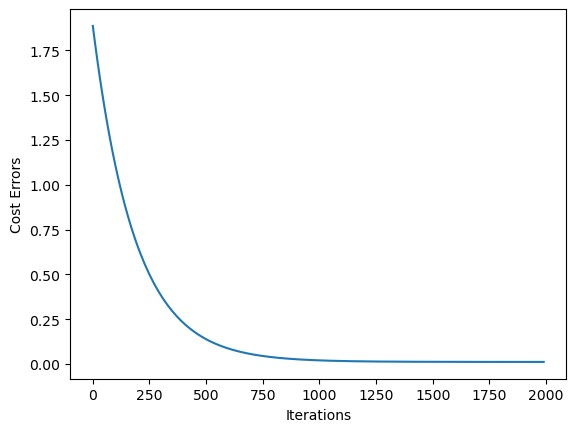

In [25]:
plt.xlabel("Iterations")
plt.ylabel("Cost Errors")
plt.plot(i,costerrors)

In [26]:
def predict(area,bedrooms,w,b):
    scale_X=sx.transform([[area,bedrooms]])
    scale_price=w[0]*scale_X[0][0]+w[1]*scale_X[0][1]+b
    
    price=sy.inverse_transform([[scale_price]])
    return price

Predicted_price=predict(2200,3,w,b)
Predicted_price

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[94.25404492]])

> 

# Stochastic Gradient Descent

In [27]:
import random
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.001):
    number_of_features=X.shape[1]
    w=np.array([1,1])
    b=1
    total_samples=X.shape[0]
    cost_list=[]
    iteration_list=[]
    for i in range(epochs):
        random_index=random.randint(1,total_samples-1)
        x_sample=X[random_index]
        y_sample=y_true[random_index]
        y_predict=np.dot(w, x_sample.T)+b
        
        w_partial=(-2/n)*(x_sample.T.dot(y_sample-y_predict))
        b_partial=(-2/n)*(y_sample-y_predict)
        
        w=w-(learning_rate*w_partial)
        b=b-(learning_rate*b_partial)
        
        
        if i%100==0:
            costerror=np.mean(np.square(y_true-y_predict))
            cost_list.append(costerror)
            iteration_list.append(i)
    
    return w,b,cost_list,iteration_list

w1,b1,costerrors1,i1=stochastic_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),20000)
w1,b1

(array([0.58040314, 0.51404519]), 0.01404901089660328)

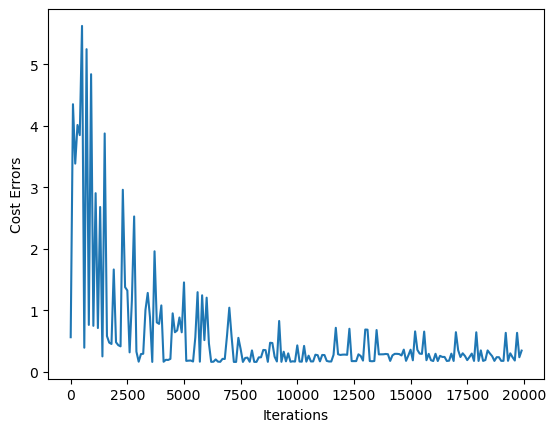

In [28]:
plt.xlabel("Iterations")
plt.ylabel("Cost Errors")
plt.plot(i1,costerrors1)

In [29]:
def predict(area,bedrooms,w,b):
    scale_X=sx.transform([[area,bedrooms]])
    scale_price=w[0]*scale_X[0][0]+w[1]*scale_X[0][1]+b
    
    price=sy.inverse_transform([[scale_price]])
    return price

Predicted_price=predict(2200,3,w,b)
Predicted_price

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[94.25404492]])